In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
#from google.colab import files
#uploaded = files.upload()

In [184]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [186]:
data.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft       True
bath             True
balcony          True
price           False
dtype: bool

In [187]:
print("Location :",data['location'].isnull().sum())
print("Size :",data['size'].isnull().sum())
print("Society :",data['society'].isnull().sum())
print("Total Square feet :",data['total_sqft'].isnull().sum())
print("Bath :",data['bath'].isnull().sum())
print("Balcony :",data['balcony'].isnull().sum())

Location : 1
Size : 16
Society : 5502
Total Square feet : 247
Bath : 73
Balcony : 609


In [188]:
data2 = data.drop(columns = ['society'], axis = 1)
data3 = data2.fillna(method = 'pad')
data3.isnull().any()

area_type       False
availability    False
location        False
size            False
total_sqft      False
bath            False
balcony         False
price           False
dtype: bool

In [189]:
corr = data3.corr()
corr

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.381760,0.136220,0.567736
bath,0.381760,1.000000,0.180829,0.454362
balcony,0.136220,0.180829,1.000000,0.101715
price,0.567736,0.454362,0.101715,1.000000


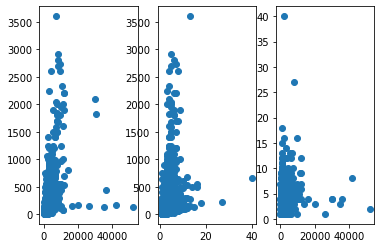

In [190]:
fig, axs = plt.subplots(1, 3)
axs[0].scatter(data3['total_sqft'], data3['price'])
axs[1].scatter(data3['bath'], data3['price'])
axs[2].scatter(data3['total_sqft'], data3['bath'])
plt.show()

In [191]:
data4 = data3[data3['price'] < 3000]
data5 = data4[data4['total_sqft'] < 20000]
data6 = data5[data5['bath'] < 20]

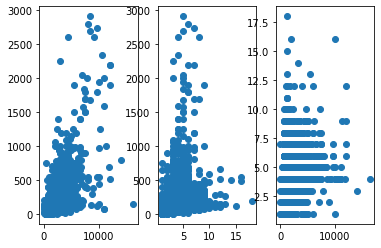

In [192]:
fig, axs = plt.subplots(1, 3)
axs[0].scatter(data6['total_sqft'], data6['price'])
axs[1].scatter(data6['bath'], data6['price'])
axs[2].scatter(data6['total_sqft'], data6['bath'])
plt.show()

In [242]:
X = data6[['total_sqft','bath','balcony']].values
y = data6['price'].values
kf = KFold(n_splits =10, shuffle = True)
splits = list(kf.split(X))
scores = []
for i in range(0,10):
    train_indices, test_indices = splits[i]
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    model = LinearRegression()
    model.fit(X_train, y_train)
    scores.append((model.score(X_test, y_test)))

np.mean(scores)

0.5274638213935299